<a href="https://colab.research.google.com/github/NP-15/Machine-learning/blob/main/Sessions/Clustering-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

In [ ]:
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import warnings
import pandas as pd

### First using distance metrics

In [ ]:
X = np.array([[1, 2], [2, 3], [5, 8], [7, 8], [1, 3], [6, 2], [6, 5], [7, 6]])

k = 2

# Euclidean distance
kmeans_euclidean = KMeans(n_clusters=k)
kmeans_euclidean.fit(X)

# Manhattan distance
kmeans_manhattan = KMeans(n_clusters=k, algorithm='full')
kmeans_manhattan.fit(X)

# Maximum norm
kmeans_max_norm = KMeans(n_clusters=k, algorithm='full')
kmeans_max_norm.fit(X)

# Mahalanobis distance
cov_matrix = np.cov(X.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)
kmeans_mahalanobis = KMeans(n_clusters=k, algorithm='full')
kmeans_mahalanobis.fit(X)

# Inner product space
def inner_product_space(x, y):
    return np.dot(x, y)

kmeans_inner_product = KMeans(n_clusters=k)
kmeans_inner_product.fit(X)

# Hamming distance
def hamming_distance(x, y):
    return np.sum(x != y)

kmeans_hamming = KMeans(n_clusters=k, algorithm='full')
kmeans_hamming.fit(X)

print("Euclidean Distance:")
print("Centroids:", kmeans_euclidean.cluster_centers_)
print("Labels:", kmeans_euclidean.labels_)
print("\nManhattan Distance:")
print("Centroids:", kmeans_manhattan.cluster_centers_)
print("Labels:", kmeans_manhattan.labels_)
print("\nMaximum Norm:")
print("Centroids:", kmeans_max_norm.cluster_centers_)
print("Labels:", kmeans_max_norm.labels_)
print("\nMahalanobis Distance:")
print("Centroids:", kmeans_mahalanobis.cluster_centers_)
print("Labels:", kmeans_mahalanobis.labels_)
print("\nInner Product Space:")
print("Centroids:", kmeans_inner_product.cluster_centers_)
print("Labels:", kmeans_inner_product.labels_)
print("\nHamming Distance:")
print("Centroids:", kmeans_hamming.cluster_centers_)
print("Labels:", kmeans_hamming.labels_)

Euclidean Distance:
Centroids: [[6.25 6.75]
 [2.5  2.5 ]]
Labels: [1 1 0 0 1 1 0 0]

Manhattan Distance:
Centroids: [[2.5  2.5 ]
 [6.25 6.75]]
Labels: [0 0 1 1 0 0 1 1]

Maximum Norm:
Centroids: [[6.25 6.75]
 [2.5  2.5 ]]
Labels: [1 1 0 0 1 1 0 0]

Mahalanobis Distance:
Centroids: [[2.5  2.5 ]
 [6.25 6.75]]
Labels: [0 0 1 1 0 0 1 1]

Inner Product Space:
Centroids: [[6.25 6.75]
 [2.5  2.5 ]]
Labels: [1 1 0 0 1 1 0 0]

Hamming Distance:
Centroids: [[2.5  2.5 ]
 [6.25 6.75]]
Labels: [0 0 1 1 0 0 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprec

### Hierarchical clustering

In [ ]:
X = [[1, 2], [2, 3], [5, 8], [7, 8], [1, 3], [6, 2], [6, 5], [7, 6]]

k = min(len(X), 5)

### Evaluation

In [ ]:
# Elbow Method
def plot_elbow(X):
    distortions = []
    K = range(1, min(len(X), 11))
    for k in K:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')
    plt.show()

# Against number of clusters
def plot_silhouette_vs_clusters(X, min_clusters, max_clusters):
    silhouette_scores = []

    for k in range(min_clusters, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        labels = kmeans.labels_
        silhouette_avg = silhouette_score(X, labels)
        silhouette_scores.append(silhouette_avg)

    plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs Number of Clusters')
    plt.show()

# Dendogram
def plot_dendrogram(X, method):
    linked = linkage(X, method=method)
    plt.figure(figsize=(10, 7))
    dendrogram(linked)
    plt.title("Hierarchical Clustering Dendrogram")
    plt.xlabel("Sample Index")
    plt.ylabel("Distance")
    plt.show()

min_clusters = 2
max_clusters = 6

#### K-mode

In [ ]:
!pip install kmodes

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 378.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 381.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 379.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 379.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 380.0
Best run was number 1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

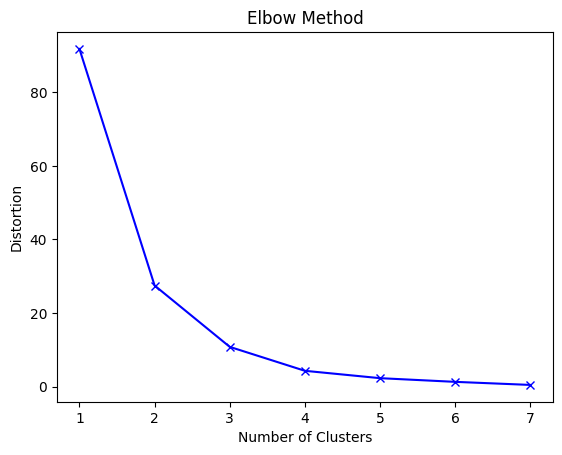

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

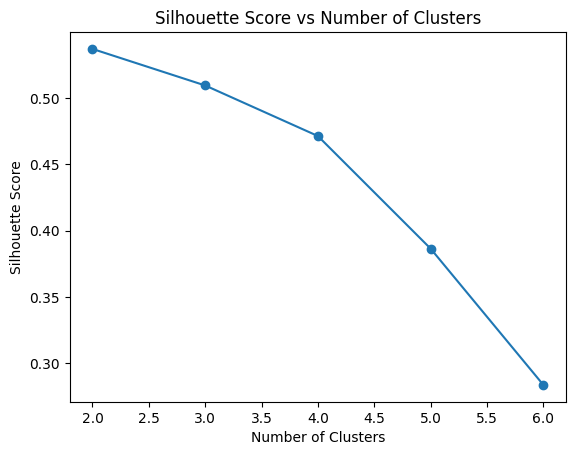

In [ ]:
from kmodes.kmodes import KModes

with warnings.catch_warnings():
    df = pd.read_csv('/content/drive/MyDrive/Machine-learning-main/assets/tvmarketing.csv')
    km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=1)
    clusters = km.fit_predict(df)
    df.insert(0, "Cluster", clusters, True)

    plot_elbow(X)
    plot_silhouette_vs_clusters(X, min_clusters, max_clusters)

In [ ]:
print(df.head())

   Cluster     TV  Sales
0        0  230.1   22.1
1        0   44.5   10.4
2        2   17.2    9.3
3        0  151.5   18.5
4        0  180.8   12.9


#### K-means++


K-means++:
Labels: [0 0 3 4 0 2 1 1]


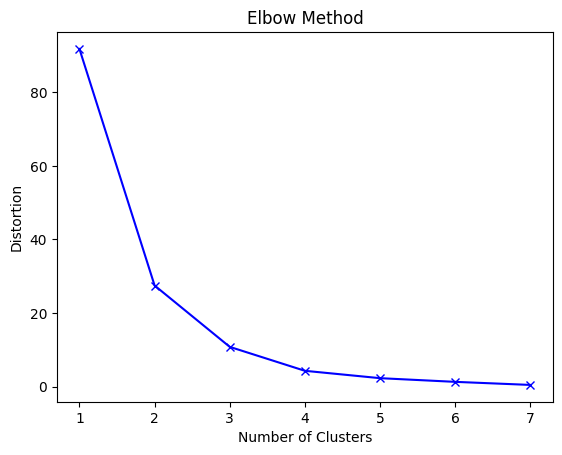

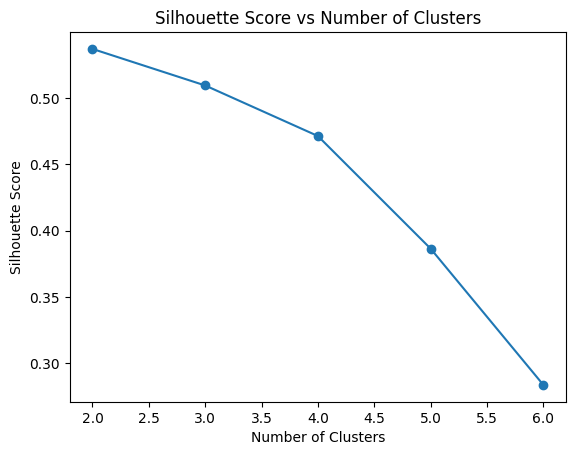

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    kmeans_plusplus = KMeans(n_clusters=k, init='k-means++')
    kmeans_plusplus.fit(X)

    print("\nK-means++:")
    print("Labels:", kmeans_plusplus.labels_)

    plot_elbow(X)
    plot_silhouette_vs_clusters(X, min_clusters, max_clusters)

#### Diana


Diana:
Labels: [1 1 3 4 1 2 0 0]


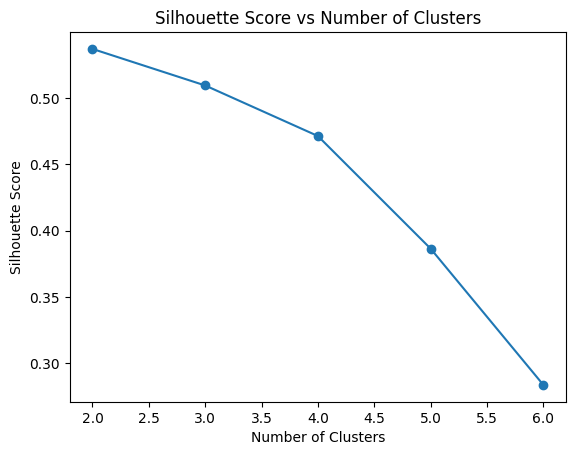

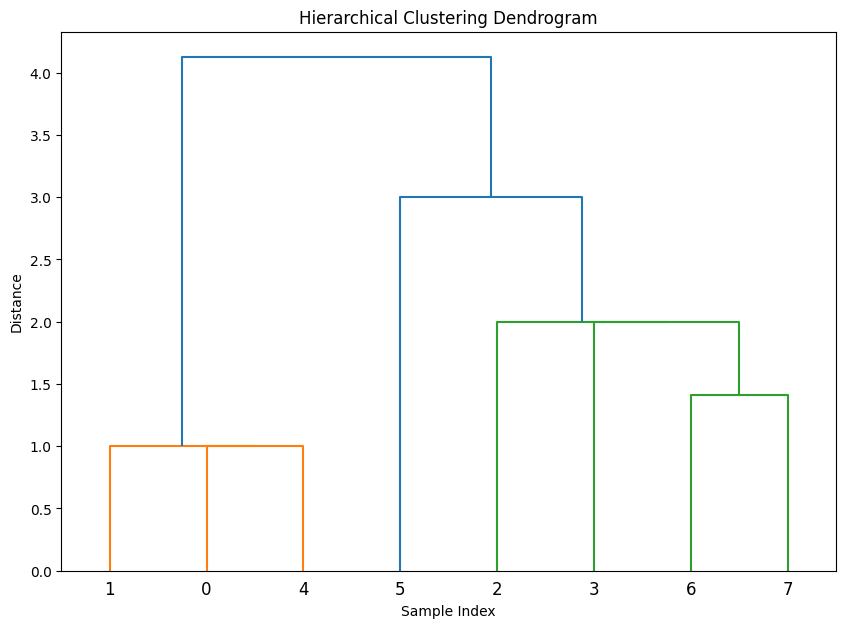

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')

    diana = AgglomerativeClustering(n_clusters=k, linkage='single')
    diana.fit(X)

    print("\nDiana:")
    print("Labels:", diana.labels_)

    plot_silhouette_vs_clusters(X, min_clusters, max_clusters)
    plot_dendrogram(X, method='single')

#### Agnes

##### Single


Agnes:
Labels: [1 1 3 4 1 2 0 0]


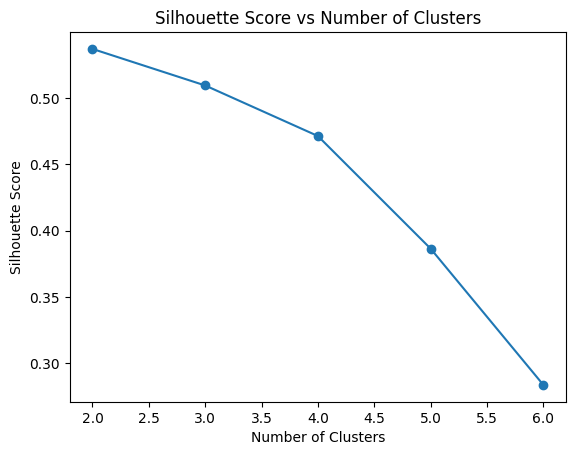

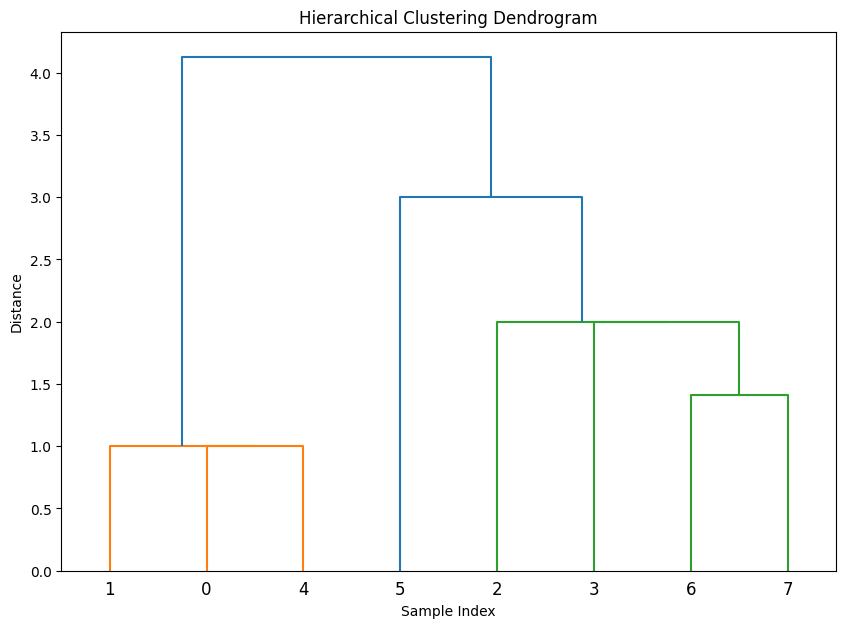

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')

    agnes = AgglomerativeClustering(n_clusters=k, linkage='single')
    agnes.fit(X)

    print("\nAgnes:")
    print("Labels:", agnes.labels_)

    plot_silhouette_vs_clusters(X, min_clusters, max_clusters)
    plot_dendrogram(X, 'single')

##### Complete


Agnes:
Labels: [1 1 4 3 1 2 0 0]


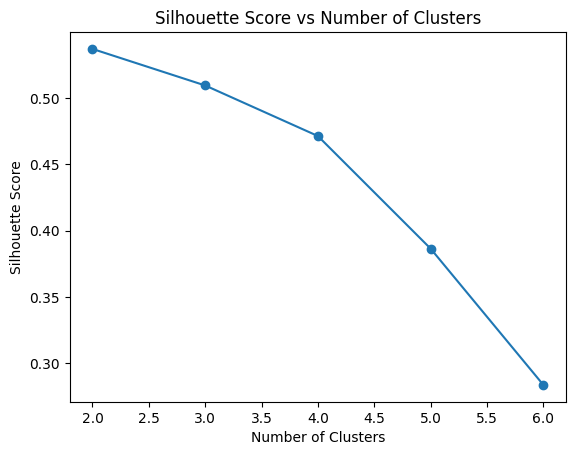

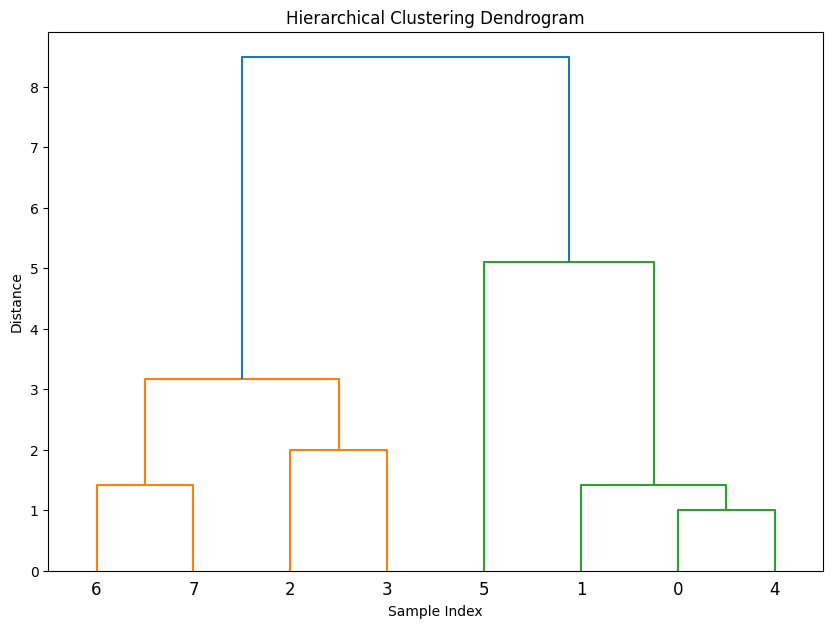

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')

    agnes = AgglomerativeClustering(n_clusters=k, linkage='complete')
    agnes.fit(X)

    print("\nAgnes:")
    print("Labels:", agnes.labels_)

    plot_silhouette_vs_clusters(X, min_clusters, max_clusters)
    plot_dendrogram(X, 'complete')

##### Average


Agnes:
Labels: [1 1 4 3 1 2 0 0]


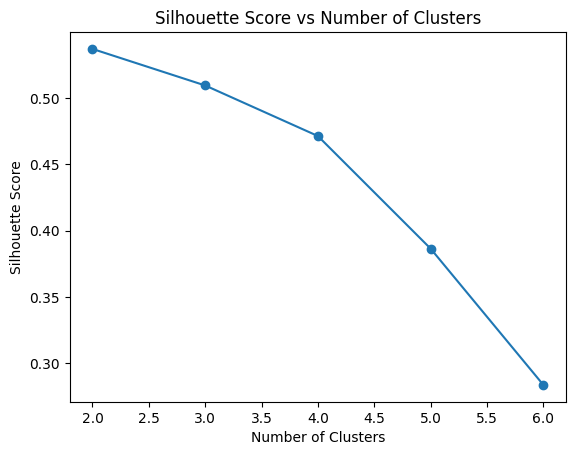

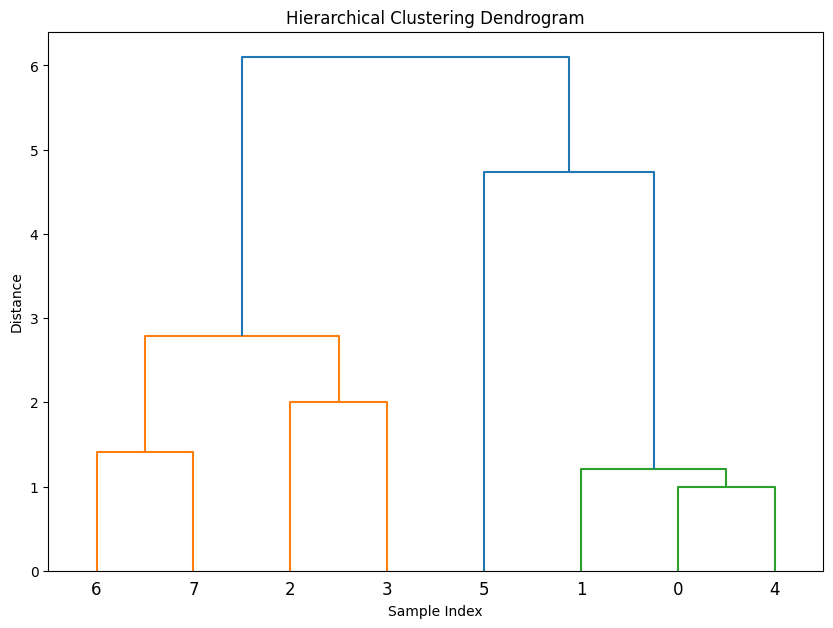

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')

    agnes = AgglomerativeClustering(n_clusters=k, linkage='average')
    agnes.fit(X)

    print("\nAgnes:")
    print("Labels:", agnes.labels_)

    plot_silhouette_vs_clusters(X, min_clusters, max_clusters)
    plot_dendrogram(X, 'average')

##### Ward


Agnes:
Labels: [1 1 4 3 1 2 0 0]


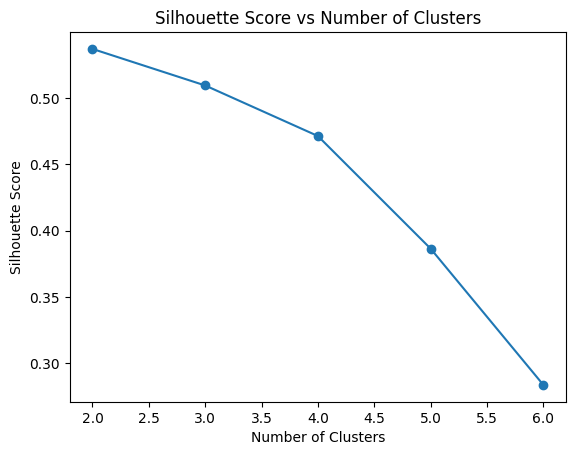

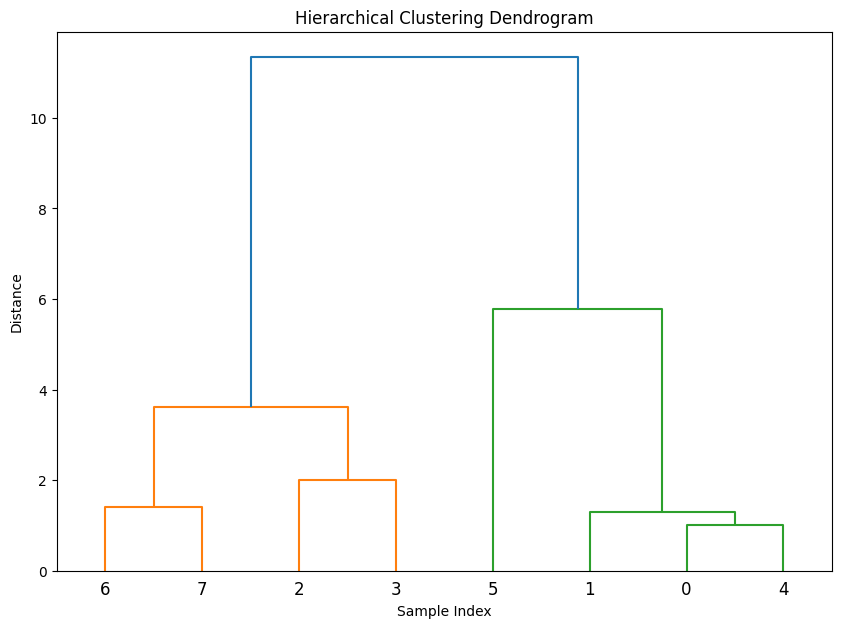

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')

    agnes = AgglomerativeClustering(n_clusters=k, linkage='ward')
    agnes.fit(X)

    print("\nAgnes:")
    print("Labels:", agnes.labels_)

    plot_silhouette_vs_clusters(X, min_clusters, max_clusters)
    plot_dendrogram(X, 'ward')

#### DBSCAN

Number of unique labels assigned by DBSCAN: 1
Labels assigned by DBSCAN: [-1 -1 -1 -1 -1 -1 -1 -1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

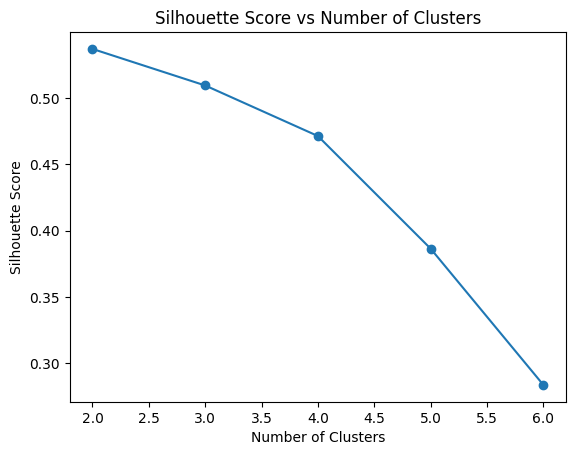

In [ ]:
dbscan = DBSCAN(eps=0.3, min_samples=2)
dbscan.fit(X)

unique_labels = np.unique(dbscan.labels_)

print("Number of unique labels assigned by DBSCAN:", len(unique_labels))
print("Labels assigned by DBSCAN:", dbscan.labels_)

#plot_silhouette(X, dbscan.labels_)
plot_silhouette_vs_clusters(X, min_clusters, max_clusters)